# Calculate cross section and attenuation

## Cross section

In [1]:
import xcom
import matplotlib.pyplot as plt

In [2]:
# For hydrogen (Z = 1)
data_1 = xcom.calculate_cross_section(1)

In [3]:
def plot(data):
    x = data["energy"]/1e6
    plt.plot(x, data["coherent"], label="Coherent")
    plt.plot(x, data["incoherent"], label="Incoherent")
    plt.plot(x, data["photoelectric"], label="Photoelectric")
    plt.plot(x, data["pair_atom"], label="Pair atom")
    plt.plot(x, data["pair_electron"], label="Pair electron")
    plt.plot(x, data["total"], label="Total")
    plt.xlabel("MeV")
    plt.ylabel("barn/atom")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()

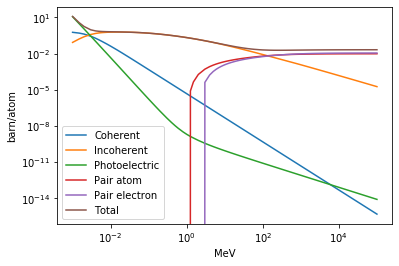

In [4]:
plot(data_1)

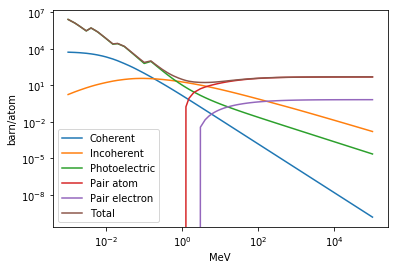

In [5]:
# Find element by symbol
data_92 = xcom.calculate_cross_section("U")
plot(data_92)

## Attenuation (cm2/gr) and Materials

In [ ]:
material = xcom.Material([1]) # Create hydrogen
data = xcom.calculate_attenuation(material)

In [ ]:
material = xcom.MaterialFactory.from_formula("H2O")
data_water = xcom.calculate_attenuation(material)
material.elements_by_Z, material.weights

([1, 8], [0.11189834407236524, 0.8881016559276347])

In [ ]:
factory  =  xcom.MaterialFactory()

In [ ]:
material = factory.add_element(1,10).add_material(xcom.Material([2,3],[20,30])).build()
data = xcom.calculate_attenuation(material)


## Get source data

In [ ]:
import tables
import matplotlib.pyplot as plt
import xcom

/Z092/data._v_attrs (AttributeSet), 23 attributes:
   [AbsorptionEdge := True,
    AtomicWeight := 238.0289,
    AtomicWeightMDATX3 := 238.050995,
    CLASS := 'TABLE',
    FIELD_0_FILL := 0.0,
    FIELD_0_NAME := 'energy',
    FIELD_1_FILL := 0.0,
    FIELD_1_NAME := 'coherent',
    FIELD_2_FILL := 0.0,
    FIELD_2_NAME := 'incoherent',
    FIELD_3_FILL := 0.0,
    FIELD_3_NAME := 'photoelectric',
    FIELD_4_FILL := 0.0,
    FIELD_4_NAME := 'pair_atom',
    FIELD_5_FILL := 0.0,
    FIELD_5_NAME := 'pair_electron',
    NROWS := 104,
    NumberAbsorptionEdgeEnergy := 12,
    TITLE := '',
    VERSION := '2.7',
    Z := 92,
    cross_section_unit := 'barn/atom',
    energy_unit := 'eV']


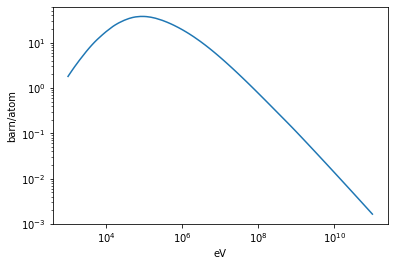

In [ ]:
with tables.open_file(xcom.NIST_XCOM_HDF5_PATH) as h5file:
    table = h5file.get_node("/Z092", "data")
    print(repr(table.attrs))
    data = table.read()
    plt.plot(data["energy"], data['incoherent'])
    plt.xlabel(table.attrs["energy_unit"])
    plt.ylabel(table.attrs["cross_section_unit"])
    plt.xscale("log")
    plt.yscale("log")